# Heart Disease Prediction Model

For this section, I will create a machine learning model to accurately predict whether a patient has risk of ten year heart disease.

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [2]:
#import dataset
df = pd.read_csv('resources/framingham.csv')

In [3]:
#remove missing values and duplicates
df = df.dropna()
df=df.drop_duplicates()
df.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
#create variables for training
X = df.drop('TenYearCHD', axis=1)
y= df['TenYearCHD']

In [5]:
#data is unbalanced. Over 3000 patients without risk of CHD while only 550 with a risk. 
y.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [6]:
#RandomOverSampler will allow the dataset to be balanced
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_res, y_res = oversample.fit_resample(X, y)
y_res.value_counts()

0    3101
1    3101
Name: TenYearCHD, dtype: int64

In [7]:
#X_selected will contain the transformed dataset with only the top 10 features selected based on the chi2 test.
k=10
selector = SelectKBest(chi2, k=k)
X_selected = selector.fit_transform(x_res, y_res)


In [8]:
#normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

In [9]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_res, random_state=2)

k: 1, Train/Test Score: 1.000/0.919
k: 3, Train/Test Score: 0.927/0.854
k: 5, Train/Test Score: 0.864/0.783
k: 7, Train/Test Score: 0.825/0.756
k: 9, Train/Test Score: 0.798/0.741
k: 11, Train/Test Score: 0.782/0.727
k: 13, Train/Test Score: 0.754/0.704
k: 15, Train/Test Score: 0.747/0.707
k: 17, Train/Test Score: 0.736/0.694
k: 19, Train/Test Score: 0.731/0.691
k: 21, Train/Test Score: 0.729/0.696
k: 23, Train/Test Score: 0.734/0.694
k: 25, Train/Test Score: 0.716/0.692
k: 27, Train/Test Score: 0.711/0.689
k: 29, Train/Test Score: 0.710/0.687
k: 31, Train/Test Score: 0.709/0.690
k: 33, Train/Test Score: 0.712/0.688
k: 35, Train/Test Score: 0.711/0.690
k: 37, Train/Test Score: 0.700/0.689
k: 39, Train/Test Score: 0.705/0.696


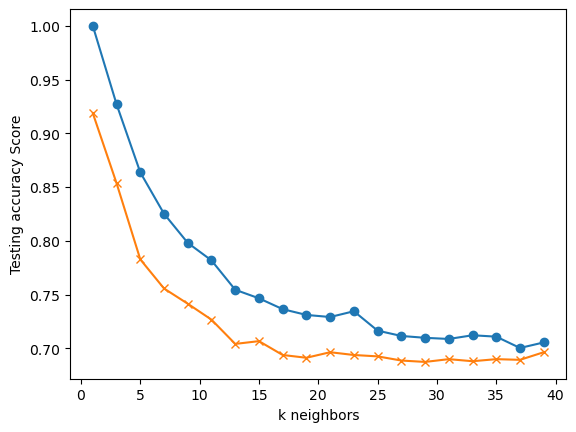

In [10]:
#to see how many neighbors we need, we can run through the sets with different amounts to see which number gives the best results
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("images/KNN_scores")
plt.show()

From the chart we can see that the best number of neighbors to use is 2 because while 1 neighbor had high scores on training data, it seemed to be overfitted.

In [11]:

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9084461637653127


The score from using a KNN model was high but I wanted a accuracy score of over 95%. I decided to switch models to see if that would raise the score so I trained a RandomForest model using different hyperparameters.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

param_grid = {
    'n_estimators': [390,391,392,393],  # Values to try for the number of estimators
    
}

# Create the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
random_forest_best = RandomForestClassifier(**best_params, random_state=42)
random_forest_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_best.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=390, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The Random Forest model seems to be the best for the dataset and allows for accuracy above 96% to see if a patient has a risk of Coronary Heart Disease.